<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import the existing folder on your Drive**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **2. Import libraries that will be used**

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import math
import os
import glob

## **3. Make an image histogram (Use image lena.jpg)**

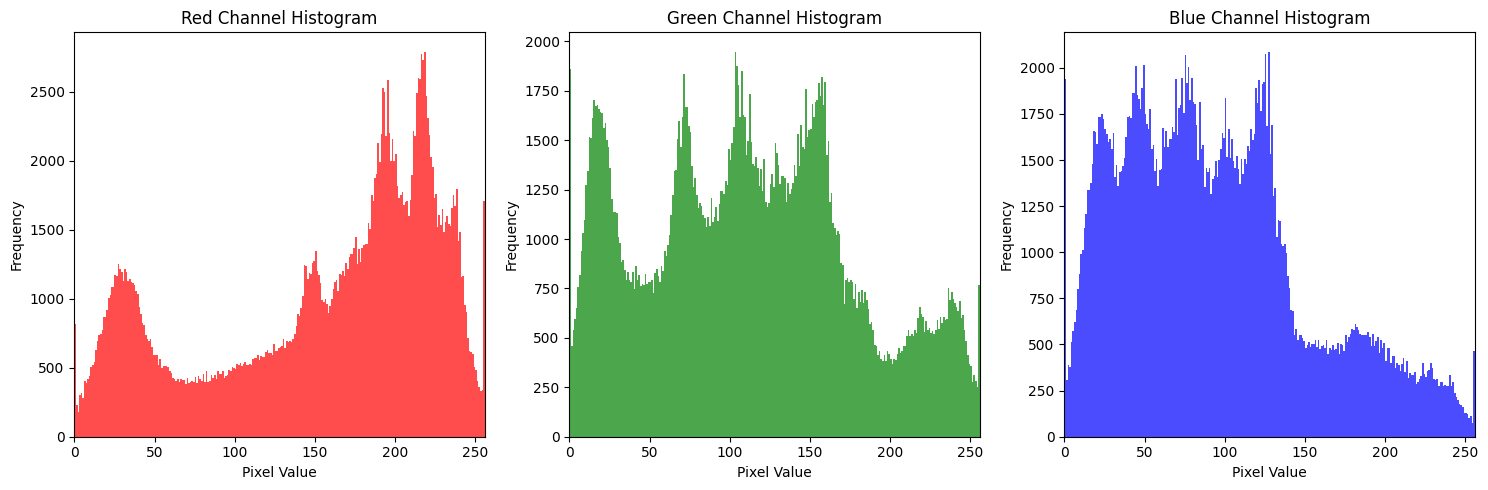

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Create subplots for each channel
plt.figure(figsize=(15, 5))
# Red Channel Histogram
plt.subplot(131)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.hist(r.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.xlim([0, 256])
# Green Channel Histogram
plt.subplot(132)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.hist(g.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.xlim([0, 256])
# Blue Channel Histogram
plt.subplot(133)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.hist(b.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.xlim([0, 256])


plt.tight_layout()
plt.show()

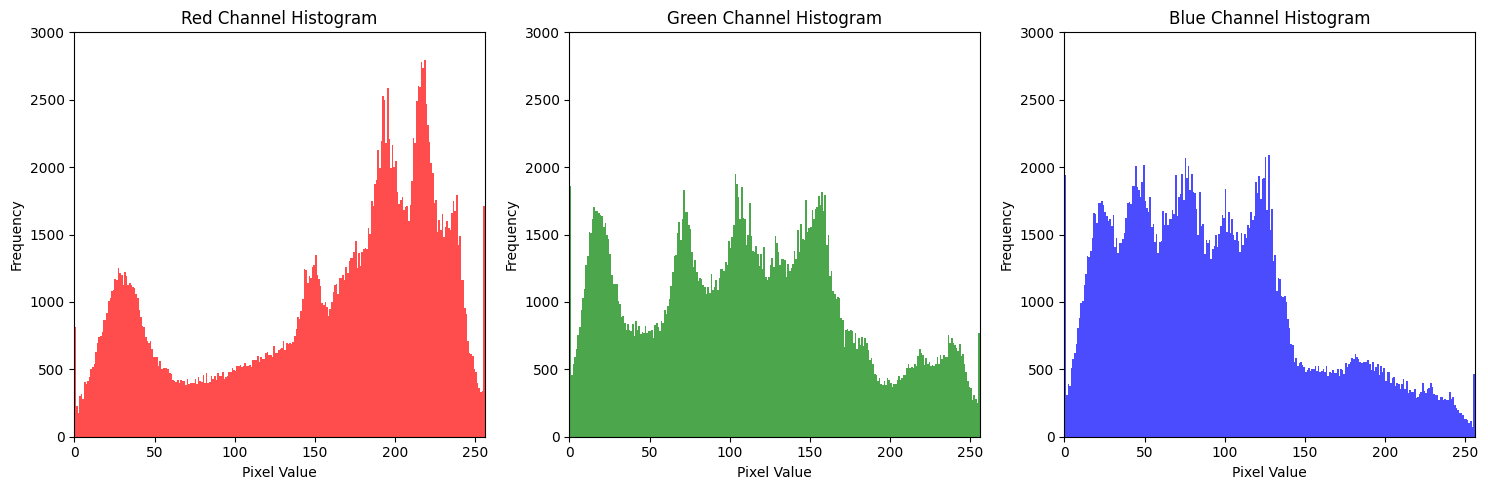

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Swap the red and blue channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Define channel names and colors
channel_info = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

# Create subplots for each channel
plt.figure(figsize=(15, 5))

for i, (channel_name, color) in enumerate(channel_info):
    plt.subplot(131 + i)
    plt.title(f'{channel_name} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    if i == 0:
        channel = r
    elif i == 1:
        channel = g
    elif i == 2:
        channel = b
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])
    plt.hist(channel.ravel(), bins=256, range=[0, 256], color=color, alpha=0.7)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])
plt.tight_layout()
plt.show()

## **4. make the same image histogram but use the library that is owned by NumPy, namely "histogram". Compare the results. Does the output appear the same?**

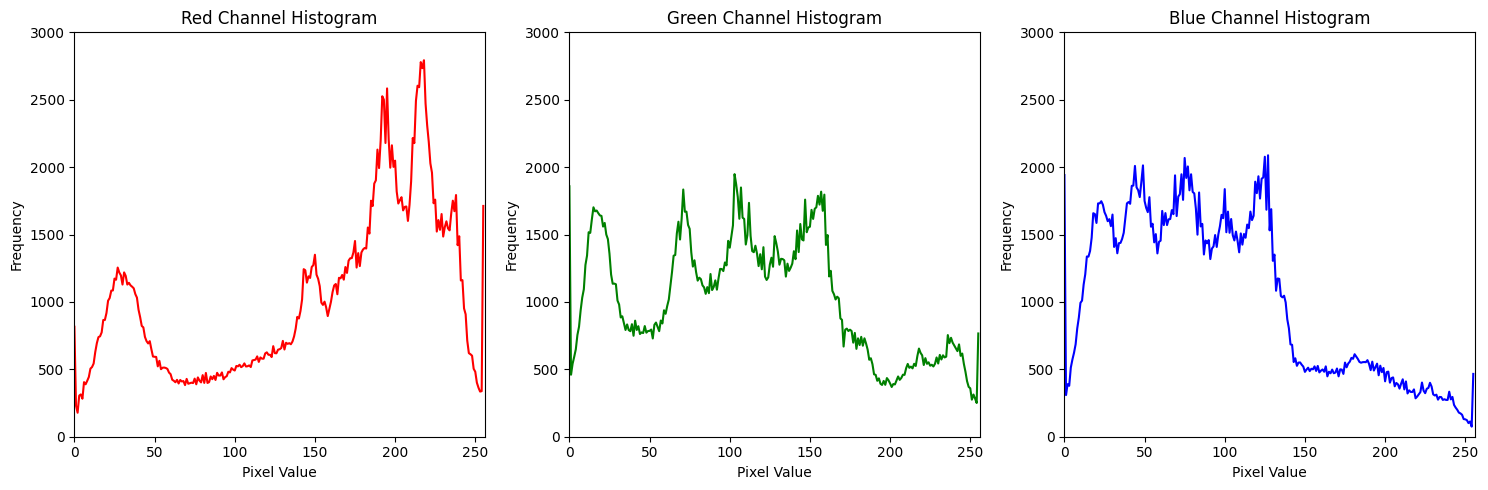

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Swap the red and blue channels
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)

# Define channel names and colors
channel_info = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

# Create subplots for each channel
plt.figure(figsize=(15, 5))

for i, (channel_name, color) in enumerate(channel_info):
    plt.subplot(131 + i)
    plt.title(f'{channel_name} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    if i == 0:
        channel = r
    elif i == 1:
        channel = g
    elif i == 2:
        channel = b
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 3000])

plt.tight_layout()
plt.show()

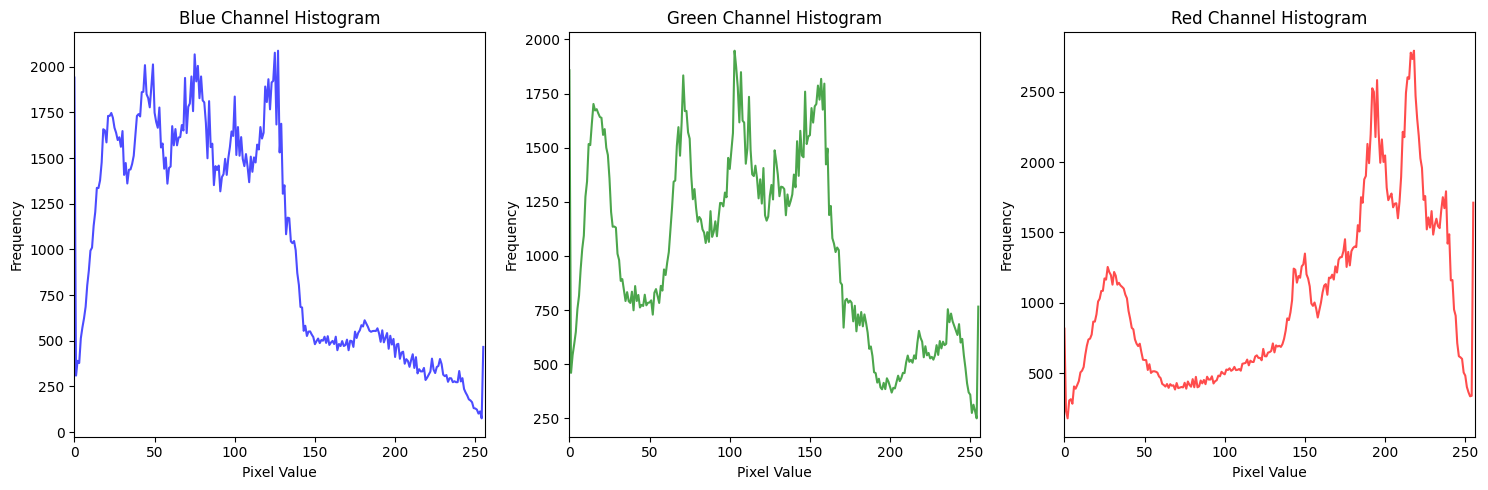

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images/lena.jpg')

# Split the image into its RGB channels
b, g, r = cv2.split(image)

# Calculate histograms using NumPy
hist_b, bins_b = np.histogram(b.flatten(), bins=256, range=[0,256])
hist_g, bins_g = np.histogram(g.flatten(), bins=256, range=[0,256])
hist_r, bins_r = np.histogram(r.flatten(), bins=256, range=[0,256])

# Create subplots for each channel
plt.figure(figsize=(15, 5))

# Blue Channel Histogram
plt.subplot(131)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist_b, color='blue', alpha=0.7)
plt.xlim([0, 256])

# Green Channel Histogram
plt.subplot(132)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist_g, color='green', alpha=0.7)
plt.xlim([0, 256])

# Red Channel Histogram
plt.subplot(133)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(hist_r, color='red', alpha=0.7)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

## **5. Make an image histogram and also the image display before and after the following equalization histogram process  (Use image lena_lc .jpg)**

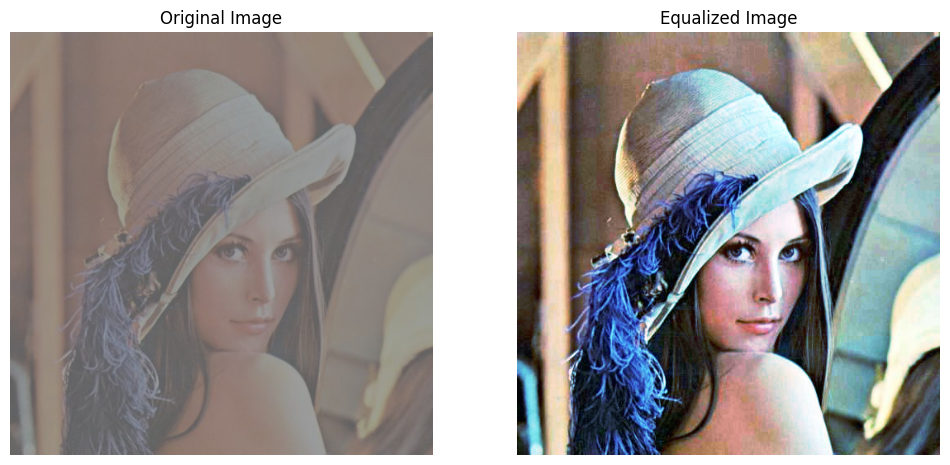

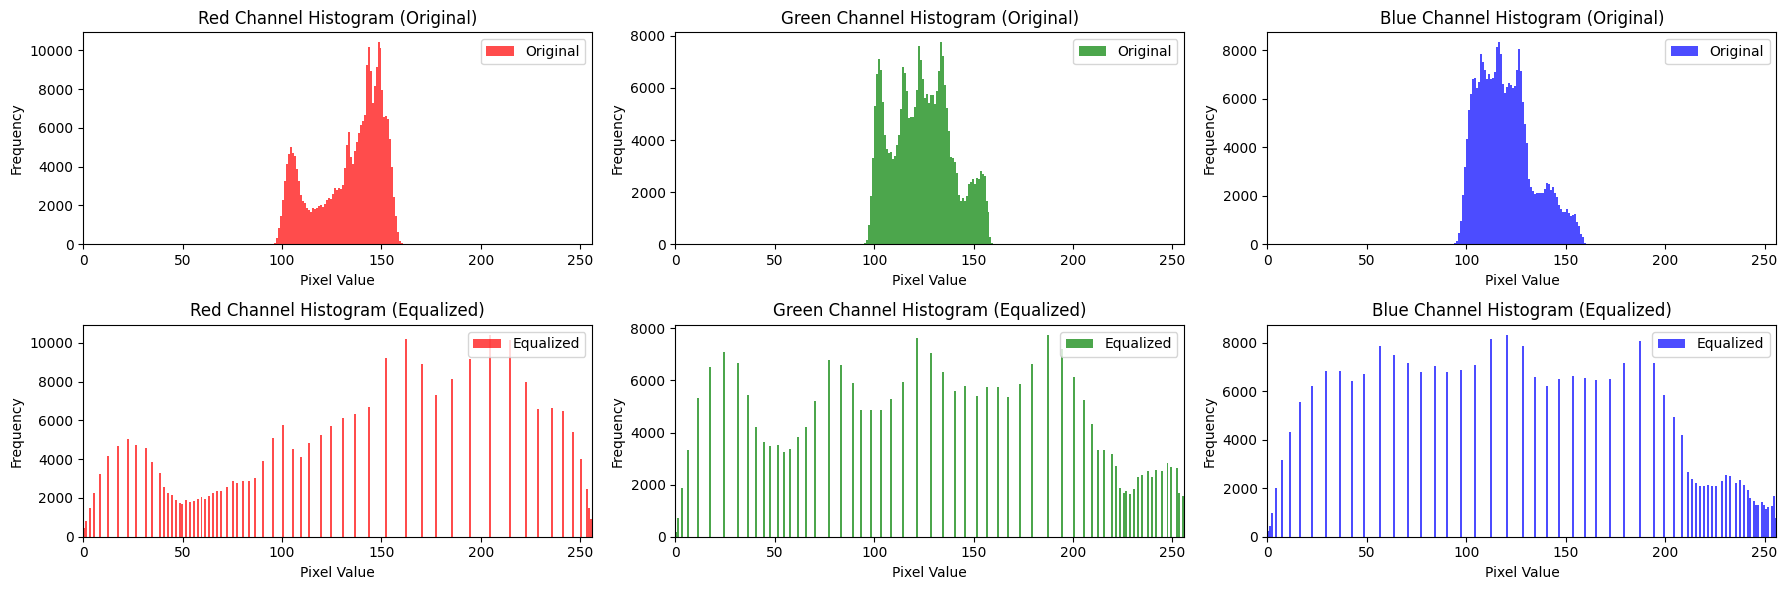

In [21]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Split the image into its color channels
b, g, r = cv2.split(img)

# Apply histogram equalization to each color channel
equalized_r = cv2.equalizeHist(r)
equalized_g = cv2.equalizeHist(g)
equalized_b = cv2.equalizeHist(b)

# Create the equalized color image by merging the equalized channels
equalized_img = cv2.merge([equalized_b, equalized_g, equalized_r])

# Display the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Calculate and display the histograms of the original and equalized color channels
plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.hist(r.ravel(), 256, [0, 256], color='r', alpha=0.7, label='Original')
plt.title('Red Channel Histogram (Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend(loc='upper right')

plt.subplot(2, 3, 2)
plt.hist(g.ravel(), 256, [0, 256], color='g', alpha=0.7, label='Original')
plt.title('Green Channel Histogram (Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend(loc='upper right')

plt.subplot(2, 3, 3)
plt.hist(b.ravel(), 256, [0, 256], color='b', alpha=0.7, label='Original')
plt.title('Blue Channel Histogram (Original)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend(loc='upper right')

plt.subplot(2, 3, 4)
plt.hist(equalized_r.ravel(), 256, [0, 256], color='r', alpha=0.7, label='Equalized')
plt.title('Red Channel Histogram (Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend(loc='upper right')

plt.subplot(2, 3, 5)
plt.hist(equalized_g.ravel(), 256, [0, 256], color='g', alpha=0.7, label='Equalized')
plt.title('Green Channel Histogram (Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend(loc='upper right')

plt.subplot(2, 3, 6)
plt.hist(equalized_b.ravel(), 256, [0, 256], color='b', alpha=0.7, label='Equalized')
plt.title('Blue Channel Histogram (Equalized)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

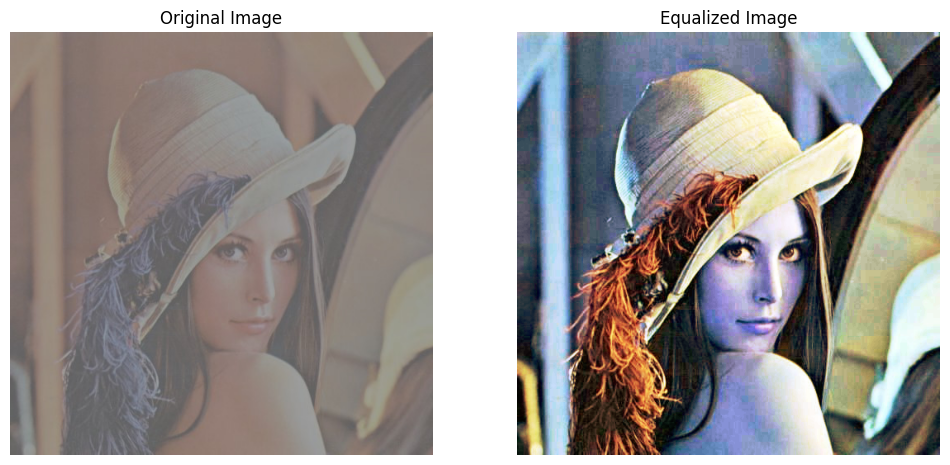

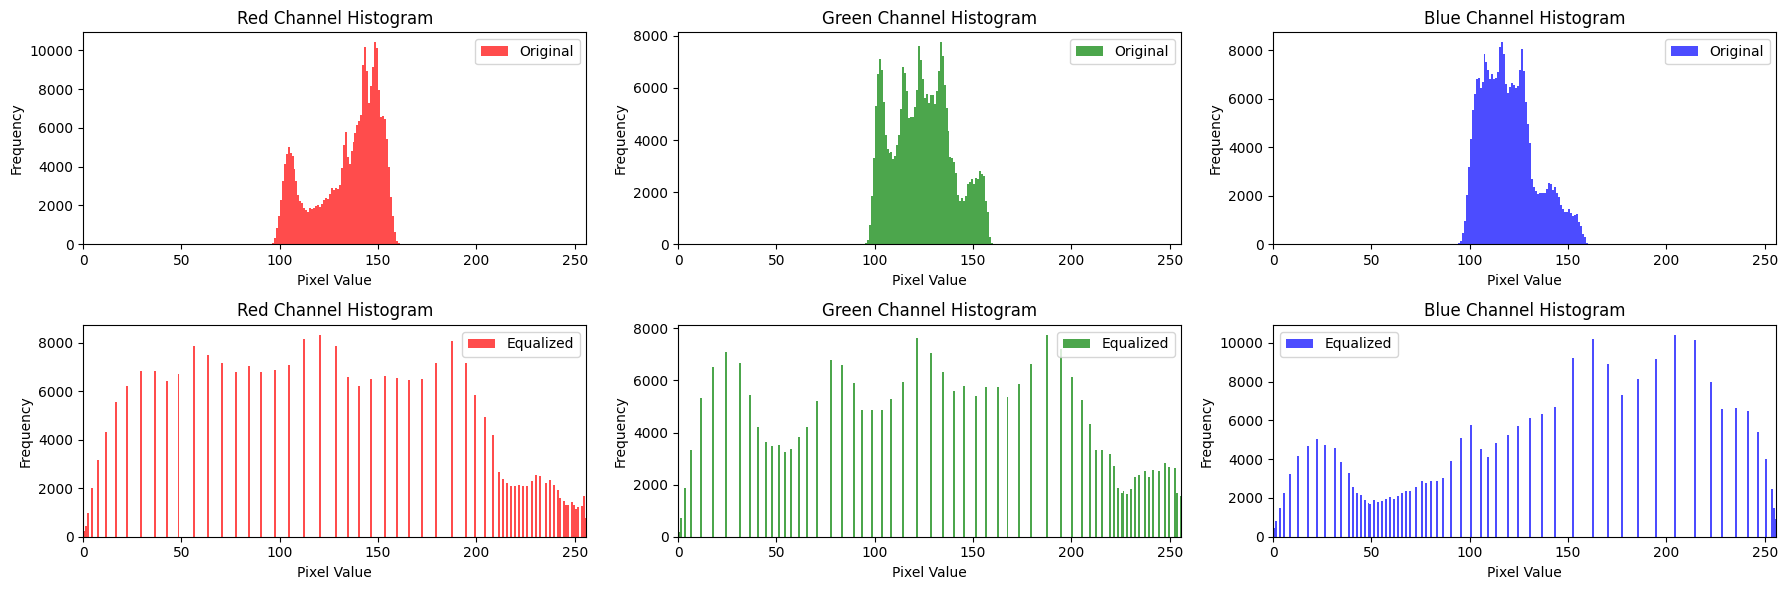

In [37]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/lena_lc.jpg')

# Swap the red and blue channels
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
r, g, b = cv2.split(img_rgb)

# Apply histogram equalization to each color channel and merge them back
equalized_channels = [cv2.equalizeHist(channel) for channel in [b, g, r]]
equalized_img = cv2.merge(equalized_channels)

# Display the original and equalized color images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img)
plt.title('Equalized Image')
plt.axis('off')

plt.show()

# Create histograms for the original and equalized color channels
def plot_histogram(channel, title, color):
    plt.hist(channel.ravel(), 256, [0, 256], color=color, alpha=0.7)
    plt.title(f'{title} Channel Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

plt.figure(figsize=(18, 6))

for i, (channel, title) in enumerate(zip([r,g,b], ['Red','Green', 'Blue']), 1):
    plt.subplot(2, 3, i)
    plot_histogram(channel, title, color=title.lower())
    plt.legend(['Original'])

for i, (channel, title) in enumerate(zip(equalized_channels, ['Red','Green', 'Blue']), 4):
    plt.subplot(2, 3, i)
    plot_histogram(channel, title, color=title.lower())
    plt.legend(['Equalized'])

plt.tight_layout()
plt.show()

## **6. make the same image histogram but use the library owned by CV2, namely "equalizeHist". Compare the results. Does the output appear the same?**

## **7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black, green, yellow, blue, cyan, magenta, white  (Use the image testlena .jpg)**

## **8. Do the Floyd and Steinberg dithering process like the following output (initial image  display, and after dithering display) (Use wiki.jpg image)**